In [7]:
import pickle
import sys
import numpy as np
import logging

sys.path.append('../../')
from didgelab.calc.geo import Geo
from didgelab.app import init_app
from tairua import TairuaLoss, PointShape
from didgelab.calc.sim.sim import get_notes, compute_impedance, create_segments, get_log_simulation_frequencies
from didgelab.evo.nuevolution import Nuevolution, LinearDecreasingMutation, PrintEvolutionInformation, \
    EarlyStopping, NuevolutionProgressBar, SimpleMutation, SingleMutation, RandomCrossover, AverageCrossover, \
    PartAverageCrossover, PartSwapCrossover
from didgelab.app import get_app

population1 = pickle.load(open("results/pop1.bin", "rb"))
target_freqs, target_impedances, target_weights, geo = pickle.load(open("results/targets.bin", "rb"))

target_weights = np.ones(len(target_freqs))
loss = TairuaLoss(target_freqs, target_impedances, target_weights)

init_app()
logging.getLogger().setLevel(logging.WARNING)

evo = Nuevolution(
    loss, 
    PointShape(geo),
    generation_size = 50,
    num_generations = 100,
    population_size = 100,
    evolution_parameters = {
        "mutation_rate": 0.2,
        "gene_mutation_prob": 0.4,
    },
    evolution_operators = [
        RandomCrossover(), 
        AverageCrossover(), 
        SimpleMutation(),
        SingleMutation(),
        PartAverageCrossover(),
        PartSwapCrossover()
    ],
    initial_population=population1,
    recompute_loss=True
)

schedulers = [
    # LinearDecreasingCrossover(),
    LinearDecreasingMutation()
]

pbi = PrintEvolutionInformation(interval=1)
es = EarlyStopping()

pbar = NuevolutionProgressBar()

max_error = 5
def generation_ended(i_generation, population):
    geo = population[0].genome2geo()
    freqs = get_log_simulation_frequencies(1, 1000, max_error)
    segments = create_segments(geo)
    impedances = compute_impedance(segments, freqs)
    notes = get_notes(freqs, impedances)
    print(notes.round(2))

    l = loss.loss(population[0])
    print(f"loss: {l['total']:.2f}")
    if "individual_losses" in l.keys():
        il = np.array(l["individual_losses"])
        print(il.round(2))

get_app().subscribe("generation_ended", generation_ended)
population2 = evo.evolve()

generation=1, best loss=8.16:   1%|          | 1/100 [00:00<00:00, 102300.10it/s]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.81     1.00
1        F2      32.37      -16  177.91      12.37     0.50
2        B3      37.37      -10  252.33      13.88     0.56
3        G3     -37.63       -2  383.57      11.88     0.48
4        B4     -47.63        2  480.48       8.07     0.33
5        D4     -22.63        5  579.70       3.63     0.15
6        E4      27.37        7  669.76       4.64     0.19
7        G4       7.37       10  787.33       1.54     0.06
8        A5      32.37       12  896.61       0.55     0.02
9        B5      12.37       14  994.85       0.96     0.04
loss: 8.16
[0.08 7.58 0.08 0.05 0.13 0.1  0.07 0.07]


generation=2, best loss=8.16:   2%|▏         | 2/100 [00:16<13:11,  8.08s/it]    

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.81     1.00
1        F2      32.37      -16  177.91      12.37     0.50
2        B3      37.37      -10  252.33      13.88     0.56
3        G3     -37.63       -2  383.57      11.88     0.48
4        B4     -47.63        2  480.48       8.07     0.33
5        D4     -22.63        5  579.70       3.63     0.15
6        E4      27.37        7  669.76       4.64     0.19
7        G4       7.37       10  787.33       1.54     0.06
8        A5      32.37       12  896.61       0.55     0.02
9        B5      12.37       14  994.85       0.96     0.04
loss: 8.16
[0.08 7.58 0.08 0.05 0.13 0.1  0.07 0.07]


2025-04-27 22:07:42,626 [ERROR] {tairua.py:88} attempt to get argmin of an empty sequence
generation=3, best loss=8.15:   3%|▎         | 3/100 [00:32<18:36, 11.51s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.92     1.00
1        F2      32.37      -16  177.91      12.35     0.50
2        B3      37.37      -10  252.33      13.80     0.55
3        G3     -37.63       -2  383.57      12.02     0.48
4        B4     -47.63        2  480.48       8.01     0.32
5        D4     -22.63        5  579.70       3.68     0.15
6        E4      27.37        7  669.76       4.61     0.19
7        G4       7.37       10  787.33       1.53     0.06
8        A5      32.37       12  896.61       0.56     0.02
9        B5      12.37       14  994.85       0.93     0.04
loss: 8.15
[0.08 7.58 0.08 0.05 0.13 0.1  0.07 0.07]


generation=4, best loss=8.15:   4%|▍         | 4/100 [00:48<20:57, 13.10s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1     -12.63      -29   81.81      24.83     1.00
1        F2      32.37      -16  177.91      12.24     0.49
2        B3      42.37      -10  253.06      14.05     0.57
3        G3     -37.63       -2  383.57      11.82     0.48
4        B4     -42.63        2  481.87       7.82     0.32
5        D4     -27.63        5  578.03       3.72     0.15
6        E4      27.37        7  669.76       4.37     0.18
7        G4       7.37       10  787.33       1.46     0.06
8        A5      27.37       12  894.02       0.61     0.02
9        B5      12.37       14  994.85       1.03     0.04
loss: 8.15
[0.08 7.58 0.08 0.05 0.13 0.1  0.06 0.08]


generation=5, best loss=8.15:   5%|▌         | 5/100 [01:04<22:33, 14.25s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1     -12.63      -29   81.81      24.87     1.00
1        F2      32.37      -16  177.91      12.57     0.51
2        B3      42.37      -10  253.06      13.97     0.56
3        G3     -32.63       -2  384.68      11.91     0.48
4        B4     -42.63        2  481.87       7.68     0.31
5        D4     -22.63        5  579.70       3.45     0.14
6        E4      27.37        7  669.76       4.42     0.18
7        G4       2.37       10  785.06       1.53     0.06
8        A5      27.37       12  894.02       0.61     0.02
9        B5      12.37       14  994.85       1.03     0.04
loss: 8.15
[0.08 7.58 0.08 0.04 0.13 0.1  0.06 0.08]


generation=6, best loss=8.15:   6%|▌         | 6/100 [01:20<23:12, 14.81s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1     -12.63      -29   81.81      24.87     1.00
1        F2      32.37      -16  177.91      12.57     0.51
2        B3      42.37      -10  253.06      13.97     0.56
3        G3     -32.63       -2  384.68      11.91     0.48
4        B4     -42.63        2  481.87       7.68     0.31
5        D4     -22.63        5  579.70       3.45     0.14
6        E4      27.37        7  669.76       4.42     0.18
7        G4       2.37       10  785.06       1.53     0.06
8        A5      27.37       12  894.02       0.61     0.02
9        B5      12.37       14  994.85       1.03     0.04
loss: 8.15
[0.08 7.58 0.08 0.04 0.13 0.1  0.06 0.08]


generation=7, best loss=8.15:   7%|▋         | 7/100 [01:37<24:04, 15.53s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1     -12.63      -29   81.81      24.87     1.00
1        F2      32.37      -16  177.91      12.57     0.51
2        B3      42.37      -10  253.06      13.97     0.56
3        G3     -32.63       -2  384.68      11.91     0.48
4        B4     -42.63        2  481.87       7.68     0.31
5        D4     -22.63        5  579.70       3.45     0.14
6        E4      27.37        7  669.76       4.42     0.18
7        G4       2.37       10  785.06       1.53     0.06
8        A5      27.37       12  894.02       0.61     0.02
9        B5      12.37       14  994.85       1.03     0.04
loss: 8.15
[0.08 7.58 0.08 0.04 0.13 0.1  0.06 0.08]


generation=8, best loss=8.15:   8%|▊         | 8/100 [01:53<23:55, 15.60s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.67     1.00
1        F2      37.37      -16  178.42      11.92     0.48
2        B3      42.37      -10  253.06      14.15     0.57
3        G3     -32.63       -2  384.68      11.61     0.47
4        B4     -37.63        2  483.26       8.01     0.32
5        D4     -22.63        5  579.70       4.01     0.16
6        E4      32.37        7  671.70       4.97     0.20
7        G4       7.37       10  787.33       1.58     0.06
8        A5      32.37       12  896.61       0.63     0.03
9        B5      12.37       14  994.85       1.03     0.04
loss: 8.15
[0.08 7.58 0.08 0.04 0.12 0.1  0.07 0.07]


generation=9, best loss=8.15:   9%|▉         | 9/100 [02:10<24:09, 15.93s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.67     1.00
1        F2      37.37      -16  178.42      11.92     0.48
2        B3      42.37      -10  253.06      14.15     0.57
3        G3     -32.63       -2  384.68      11.61     0.47
4        B4     -37.63        2  483.26       8.01     0.32
5        D4     -22.63        5  579.70       4.01     0.16
6        E4      32.37        7  671.70       4.97     0.20
7        G4       7.37       10  787.33       1.58     0.06
8        A5      32.37       12  896.61       0.63     0.03
9        B5      12.37       14  994.85       1.03     0.04
loss: 8.15
[0.08 7.58 0.08 0.04 0.12 0.1  0.07 0.07]


generation=10, best loss=8.15:  10%|█         | 10/100 [02:27<24:29, 16.33s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.67     1.00
1        F2      37.37      -16  178.42      11.92     0.48
2        B3      42.37      -10  253.06      14.15     0.57
3        G3     -32.63       -2  384.68      11.61     0.47
4        B4     -37.63        2  483.26       8.01     0.32
5        D4     -22.63        5  579.70       4.01     0.16
6        E4      32.37        7  671.70       4.97     0.20
7        G4       7.37       10  787.33       1.58     0.06
8        A5      32.37       12  896.61       0.63     0.03
9        B5      12.37       14  994.85       1.03     0.04
loss: 8.15
[0.08 7.58 0.08 0.04 0.12 0.1  0.07 0.07]


generation=11, best loss=8.15:  11%|█         | 11/100 [02:43<24:13, 16.33s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.67     1.00
1        F2      37.37      -16  178.42      11.92     0.48
2        B3      42.37      -10  253.06      14.15     0.57
3        G3     -32.63       -2  384.68      11.61     0.47
4        B4     -37.63        2  483.26       8.01     0.32
5        D4     -22.63        5  579.70       4.01     0.16
6        E4      32.37        7  671.70       4.97     0.20
7        G4       7.37       10  787.33       1.58     0.06
8        A5      32.37       12  896.61       0.63     0.03
9        B5      12.37       14  994.85       1.03     0.04
loss: 8.15
[0.08 7.58 0.08 0.04 0.12 0.1  0.07 0.07]


generation=12, best loss=8.15:  12%|█▏        | 12/100 [02:59<23:53, 16.29s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.67     1.00
1        F2      37.37      -16  178.42      11.92     0.48
2        B3      42.37      -10  253.06      14.15     0.57
3        G3     -32.63       -2  384.68      11.61     0.47
4        B4     -37.63        2  483.26       8.01     0.32
5        D4     -22.63        5  579.70       4.01     0.16
6        E4      32.37        7  671.70       4.97     0.20
7        G4       7.37       10  787.33       1.58     0.06
8        A5      32.37       12  896.61       0.63     0.03
9        B5      12.37       14  994.85       1.03     0.04
loss: 8.15
[0.08 7.58 0.08 0.04 0.12 0.1  0.07 0.07]


generation=13, best loss=8.15:  13%|█▎        | 13/100 [03:16<23:38, 16.31s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.71     1.00
1        F2      37.37      -16  178.42      11.94     0.48
2        B3      42.37      -10  253.06      14.12     0.57
3        G3     -32.63       -2  384.68      11.58     0.47
4        B4     -37.63        2  483.26       8.04     0.33
5        D4     -17.63        5  581.38       4.00     0.16
6        E4      32.37        7  671.70       4.97     0.20
7        G4      12.37       10  789.61       1.59     0.06
8        A5      32.37       12  896.61       0.62     0.03
9        B5      12.37       14  994.85       1.04     0.04
loss: 8.15
[0.08 7.58 0.08 0.04 0.12 0.1  0.07 0.07]


generation=14, best loss=8.15:  14%|█▍        | 14/100 [03:31<23:09, 16.16s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.71     1.00
1        F2      37.37      -16  178.42      11.94     0.48
2        B3      42.37      -10  253.06      14.12     0.57
3        G3     -32.63       -2  384.68      11.58     0.47
4        B4     -37.63        2  483.26       8.04     0.33
5        D4     -17.63        5  581.38       4.00     0.16
6        E4      32.37        7  671.70       4.97     0.20
7        G4      12.37       10  789.61       1.59     0.06
8        A5      32.37       12  896.61       0.62     0.03
9        B5      12.37       14  994.85       1.04     0.04
loss: 8.15
[0.08 7.58 0.08 0.04 0.12 0.1  0.07 0.07]


generation=15, best loss=8.15:  15%|█▌        | 15/100 [03:47<22:42, 16.02s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.70     1.00
1        F2      37.37      -16  178.42      11.93     0.48
2        B3      42.37      -10  253.06      14.04     0.57
3        G3     -32.63       -2  384.68      11.54     0.47
4        B4     -37.63        2  483.26       8.13     0.33
5        D4     -22.63        5  579.70       4.01     0.16
6        E4      32.37        7  671.70       4.93     0.20
7        G4       7.37       10  787.33       1.57     0.06
8        A5      32.37       12  896.61       0.61     0.02
9        B5      12.37       14  994.85       1.08     0.04
loss: 8.15
[0.08 7.58 0.08 0.04 0.12 0.1  0.07 0.07]


generation=16, best loss=8.15:  16%|█▌        | 16/100 [04:04<22:53, 16.35s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.70     1.00
1        F2      37.37      -16  178.42      11.92     0.48
2        B3      42.37      -10  253.06      14.05     0.57
3        G3     -32.63       -2  384.68      11.54     0.47
4        B4     -37.63        2  483.26       8.10     0.33
5        D4     -22.63        5  579.70       4.03     0.16
6        E4      32.37        7  671.70       4.90     0.20
7        G4       7.37       10  787.33       1.57     0.06
8        A5      32.37       12  896.61       0.61     0.02
9        B5      12.37       14  994.85       1.07     0.04
loss: 8.15
[0.08 7.58 0.08 0.04 0.12 0.1  0.07 0.07]


generation=17, best loss=8.14:  17%|█▋        | 17/100 [04:20<22:31, 16.28s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.69     1.00
1        F2      37.37      -16  178.42      11.96     0.48
2        B3      47.37      -10  253.79      14.10     0.57
3        G3     -32.63       -2  384.68      11.47     0.46
4        B4     -37.63        2  483.26       8.09     0.33
5        D4     -17.63        5  581.38       3.98     0.16
6        E4      32.37        7  671.70       4.95     0.20
7        G4       7.37       10  787.33       1.61     0.07
8        A5      32.37       12  896.61       0.61     0.02
9        B5      12.37       14  994.85       1.07     0.04
loss: 8.14
[0.08 7.58 0.08 0.04 0.12 0.1  0.07 0.07]


generation=18, best loss=8.14:  18%|█▊        | 18/100 [04:37<22:24, 16.39s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.57     1.00
1        F2      37.37      -16  178.42      12.07     0.49
2        B3      47.37      -10  253.79      14.21     0.58
3        G3     -27.63       -2  385.79      11.52     0.47
4        B4     -37.63        2  483.26       7.90     0.32
5        D4     -22.63        5  579.70       3.88     0.16
6        E4      32.37        7  671.70       4.84     0.20
7        G4       7.37       10  787.33       1.58     0.06
8        A5      32.37       12  896.61       0.64     0.03
9        B5      12.37       14  994.85       1.11     0.05
loss: 8.14
[0.08 7.58 0.08 0.04 0.12 0.1  0.07 0.08]


generation=19, best loss=8.14:  19%|█▉        | 19/100 [04:54<22:15, 16.49s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.57     1.00
1        F2      37.37      -16  178.42      12.07     0.49
2        B3      47.37      -10  253.79      14.21     0.58
3        G3     -27.63       -2  385.79      11.52     0.47
4        B4     -37.63        2  483.26       7.90     0.32
5        D4     -22.63        5  579.70       3.88     0.16
6        E4      32.37        7  671.70       4.84     0.20
7        G4       7.37       10  787.33       1.58     0.06
8        A5      32.37       12  896.61       0.64     0.03
9        B5      12.37       14  994.85       1.11     0.05
loss: 8.14
[0.08 7.58 0.08 0.04 0.12 0.1  0.07 0.08]


generation=20, best loss=8.14:  20%|██        | 20/100 [05:10<21:44, 16.31s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.57     1.00
1        F2      37.37      -16  178.42      12.07     0.49
2        B3      47.37      -10  253.79      14.21     0.58
3        G3     -27.63       -2  385.79      11.52     0.47
4        B4     -37.63        2  483.26       7.90     0.32
5        D4     -22.63        5  579.70       3.88     0.16
6        E4      32.37        7  671.70       4.84     0.20
7        G4       7.37       10  787.33       1.58     0.06
8        A5      32.37       12  896.61       0.64     0.03
9        B5      12.37       14  994.85       1.11     0.05
loss: 8.14
[0.08 7.58 0.08 0.04 0.12 0.1  0.07 0.08]


generation=21, best loss=8.14:  21%|██        | 21/100 [05:26<21:36, 16.41s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.57     1.00
1        F2      37.37      -16  178.42      12.07     0.49
2        B3      47.37      -10  253.79      14.21     0.58
3        G3     -27.63       -2  385.79      11.52     0.47
4        B4     -37.63        2  483.26       7.90     0.32
5        D4     -22.63        5  579.70       3.88     0.16
6        E4      32.37        7  671.70       4.84     0.20
7        G4       7.37       10  787.33       1.58     0.06
8        A5      32.37       12  896.61       0.64     0.03
9        B5      12.37       14  994.85       1.11     0.05
loss: 8.14
[0.08 7.58 0.08 0.04 0.12 0.1  0.07 0.08]


generation=22, best loss=8.14:  22%|██▏       | 22/100 [05:43<21:21, 16.43s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.57     1.00
1        F2      37.37      -16  178.42      12.07     0.49
2        B3      47.37      -10  253.79      14.21     0.58
3        G3     -27.63       -2  385.79      11.52     0.47
4        B4     -37.63        2  483.26       7.90     0.32
5        D4     -22.63        5  579.70       3.88     0.16
6        E4      32.37        7  671.70       4.84     0.20
7        G4       7.37       10  787.33       1.58     0.06
8        A5      32.37       12  896.61       0.64     0.03
9        B5      12.37       14  994.85       1.11     0.05
loss: 8.14
[0.08 7.58 0.08 0.04 0.12 0.1  0.07 0.08]


generation=23, best loss=8.14:  23%|██▎       | 23/100 [05:59<21:02, 16.39s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.57     1.00
1        F2      37.37      -16  178.42      12.07     0.49
2        B3      47.37      -10  253.79      14.21     0.58
3        G3     -27.63       -2  385.79      11.52     0.47
4        B4     -37.63        2  483.26       7.90     0.32
5        D4     -22.63        5  579.70       3.88     0.16
6        E4      32.37        7  671.70       4.84     0.20
7        G4       7.37       10  787.33       1.58     0.06
8        A5      32.37       12  896.61       0.64     0.03
9        B5      12.37       14  994.85       1.11     0.05
loss: 8.14
[0.08 7.58 0.08 0.04 0.12 0.1  0.07 0.08]


generation=24, best loss=8.14:  24%|██▍       | 24/100 [06:17<21:19, 16.84s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.57     1.00
1        F2      37.37      -16  178.42      12.07     0.49
2        B3      47.37      -10  253.79      14.21     0.58
3        G3     -27.63       -2  385.79      11.52     0.47
4        B4     -37.63        2  483.26       7.90     0.32
5        D4     -22.63        5  579.70       3.88     0.16
6        E4      32.37        7  671.70       4.84     0.20
7        G4       7.37       10  787.33       1.58     0.06
8        A5      32.37       12  896.61       0.64     0.03
9        B5      12.37       14  994.85       1.11     0.05
loss: 8.14
[0.08 7.58 0.08 0.04 0.12 0.1  0.07 0.08]


generation=25, best loss=8.14:  25%|██▌       | 25/100 [06:34<21:03, 16.85s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.57     1.00
1        F2      37.37      -16  178.42      12.07     0.49
2        B3      47.37      -10  253.79      14.21     0.58
3        G3     -27.63       -2  385.79      11.52     0.47
4        B4     -37.63        2  483.26       7.90     0.32
5        D4     -22.63        5  579.70       3.88     0.16
6        E4      32.37        7  671.70       4.84     0.20
7        G4       7.37       10  787.33       1.58     0.06
8        A5      32.37       12  896.61       0.64     0.03
9        B5      12.37       14  994.85       1.11     0.05
loss: 8.14
[0.08 7.58 0.08 0.04 0.12 0.1  0.07 0.08]


generation=26, best loss=8.14:  26%|██▌       | 26/100 [07:26<33:58, 27.55s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.65     1.00
1        F2      37.37      -16  178.42      12.02     0.49
2        B3      47.37      -10  253.79      14.00     0.57
3        G3     -32.63       -2  384.68      11.65     0.47
4        B4     -37.63        2  483.26       7.80     0.32
5        D4     -22.63        5  579.70       4.10     0.17
6        E4      32.37        7  671.70       4.69     0.19
7        G4       7.37       10  787.33       1.64     0.07
8        A5      32.37       12  896.61       0.61     0.02
9        B5      12.37       14  994.85       1.11     0.04
loss: 8.14
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=27, best loss=8.14:  27%|██▋       | 27/100 [07:44<29:49, 24.52s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.65     1.00
1        F2      37.37      -16  178.42      12.02     0.49
2        B3      47.37      -10  253.79      14.00     0.57
3        G3     -32.63       -2  384.68      11.65     0.47
4        B4     -37.63        2  483.26       7.80     0.32
5        D4     -22.63        5  579.70       4.10     0.17
6        E4      32.37        7  671.70       4.69     0.19
7        G4       7.37       10  787.33       1.64     0.07
8        A5      32.37       12  896.61       0.61     0.02
9        B5      12.37       14  994.85       1.11     0.04
loss: 8.14
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=28, best loss=8.14:  28%|██▊       | 28/100 [08:01<26:48, 22.35s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.65     1.00
1        F2      37.37      -16  178.42      12.02     0.49
2        B3      47.37      -10  253.79      14.00     0.57
3        G3     -32.63       -2  384.68      11.65     0.47
4        B4     -37.63        2  483.26       7.80     0.32
5        D4     -22.63        5  579.70       4.10     0.17
6        E4      32.37        7  671.70       4.69     0.19
7        G4       7.37       10  787.33       1.64     0.07
8        A5      32.37       12  896.61       0.61     0.02
9        B5      12.37       14  994.85       1.11     0.04
loss: 8.14
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=29, best loss=8.14:  29%|██▉       | 29/100 [08:18<24:25, 20.64s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.65     1.00
1        F2      37.37      -16  178.42      12.02     0.49
2        B3      47.37      -10  253.79      14.00     0.57
3        G3     -32.63       -2  384.68      11.65     0.47
4        B4     -37.63        2  483.26       7.80     0.32
5        D4     -22.63        5  579.70       4.10     0.17
6        E4      32.37        7  671.70       4.69     0.19
7        G4       7.37       10  787.33       1.64     0.07
8        A5      32.37       12  896.61       0.61     0.02
9        B5      12.37       14  994.85       1.11     0.04
loss: 8.14
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=30, best loss=8.14:  30%|███       | 30/100 [08:34<22:34, 19.35s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.67     1.00
1        F2      37.37      -16  178.42      12.07     0.49
2        B3      47.37      -10  253.79      14.05     0.57
3        G3     -27.63       -2  385.79      11.54     0.47
4        B4     -37.63        2  483.26       7.86     0.32
5        D4     -17.63        5  581.38       3.93     0.16
6        E4      32.37        7  671.70       4.82     0.20
7        G4       7.37       10  787.33       1.62     0.07
8        A5      32.37       12  896.61       0.63     0.03
9        B5      12.37       14  994.85       1.07     0.04
loss: 8.14
[0.08 7.58 0.08 0.04 0.12 0.1  0.07 0.07]


generation=31, best loss=8.14:  31%|███       | 31/100 [08:51<21:32, 18.74s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.67     1.00
1        F2      37.37      -16  178.42      12.07     0.49
2        B3      47.37      -10  253.79      14.05     0.57
3        G3     -27.63       -2  385.79      11.54     0.47
4        B4     -37.63        2  483.26       7.86     0.32
5        D4     -17.63        5  581.38       3.93     0.16
6        E4      32.37        7  671.70       4.82     0.20
7        G4       7.37       10  787.33       1.62     0.07
8        A5      32.37       12  896.61       0.63     0.03
9        B5      12.37       14  994.85       1.07     0.04
loss: 8.14
[0.08 7.58 0.08 0.04 0.12 0.1  0.07 0.07]


generation=32, best loss=8.14:  32%|███▏      | 32/100 [09:09<20:48, 18.37s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.67     1.00
1        F2      37.37      -16  178.42      12.17     0.49
2        B3      47.37      -10  253.79      13.95     0.57
3        G3     -27.63       -2  385.79      11.73     0.48
4        B4     -37.63        2  483.26       7.72     0.31
5        D4     -22.63        5  579.70       3.95     0.16
6        E4      32.37        7  671.70       4.72     0.19
7        G4       7.37       10  787.33       1.68     0.07
8        A5      27.37       12  894.02       0.61     0.02
9        B5      12.37       14  994.85       1.10     0.04
loss: 8.14
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.08]


generation=33, best loss=8.14:  33%|███▎      | 33/100 [09:26<20:08, 18.04s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.67     1.00
1        F2      37.37      -16  178.42      12.17     0.49
2        B3      47.37      -10  253.79      13.95     0.57
3        G3     -27.63       -2  385.79      11.73     0.48
4        B4     -37.63        2  483.26       7.72     0.31
5        D4     -22.63        5  579.70       3.95     0.16
6        E4      32.37        7  671.70       4.72     0.19
7        G4       7.37       10  787.33       1.68     0.07
8        A5      27.37       12  894.02       0.61     0.02
9        B5      12.37       14  994.85       1.10     0.04
loss: 8.14
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.08]


generation=34, best loss=8.13:  34%|███▍      | 34/100 [09:43<19:33, 17.79s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.71     1.00
1        F2      37.37      -16  178.42      12.07     0.49
2        B3      47.37      -10  253.79      14.05     0.57
3        G3     -27.63       -2  385.79      11.62     0.47
4        B4     -37.63        2  483.26       7.75     0.31
5        D4     -22.63        5  579.70       4.07     0.16
6        E4      32.37        7  671.70       4.69     0.19
7        G4       7.37       10  787.33       1.65     0.07
8        A5      32.37       12  896.61       0.61     0.02
9        B5      12.37       14  994.85       1.11     0.04
loss: 8.13
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=35, best loss=8.13:  35%|███▌      | 35/100 [10:01<19:08, 17.67s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.67     1.00
1        F2      37.37      -16  178.42      12.10     0.49
2        B3      47.37      -10  253.79      13.97     0.57
3        G3     -27.63       -2  385.79      11.65     0.47
4        B4     -37.63        2  483.26       7.75     0.31
5        D4     -17.63        5  581.38       4.01     0.16
6        E4      32.37        7  671.70       4.71     0.19
7        G4       7.37       10  787.33       1.67     0.07
8        A5      32.37       12  896.61       0.61     0.02
9        B5      12.37       14  994.85       1.10     0.04
loss: 8.13
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=36, best loss=8.13:  36%|███▌      | 36/100 [10:18<18:42, 17.53s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.67     1.00
1        F2      37.37      -16  178.42      12.10     0.49
2        B3      47.37      -10  253.79      13.97     0.57
3        G3     -27.63       -2  385.79      11.65     0.47
4        B4     -37.63        2  483.26       7.75     0.31
5        D4     -17.63        5  581.38       4.01     0.16
6        E4      32.37        7  671.70       4.71     0.19
7        G4       7.37       10  787.33       1.67     0.07
8        A5      32.37       12  896.61       0.61     0.02
9        B5      12.37       14  994.85       1.10     0.04
loss: 8.13
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=37, best loss=8.13:  37%|███▋      | 37/100 [10:35<18:09, 17.30s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.67     1.00
1        F2      37.37      -16  178.42      12.10     0.49
2        B3      47.37      -10  253.79      13.97     0.57
3        G3     -27.63       -2  385.79      11.65     0.47
4        B4     -37.63        2  483.26       7.75     0.31
5        D4     -17.63        5  581.38       4.01     0.16
6        E4      32.37        7  671.70       4.71     0.19
7        G4       7.37       10  787.33       1.67     0.07
8        A5      32.37       12  896.61       0.61     0.02
9        B5      12.37       14  994.85       1.10     0.04
loss: 8.13
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=38, best loss=8.13:  38%|███▊      | 38/100 [10:52<17:49, 17.24s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.67     1.00
1        F2      37.37      -16  178.42      12.10     0.49
2        B3      47.37      -10  253.79      13.97     0.57
3        G3     -27.63       -2  385.79      11.65     0.47
4        B4     -37.63        2  483.26       7.75     0.31
5        D4     -17.63        5  581.38       4.01     0.16
6        E4      32.37        7  671.70       4.71     0.19
7        G4       7.37       10  787.33       1.67     0.07
8        A5      32.37       12  896.61       0.61     0.02
9        B5      12.37       14  994.85       1.10     0.04
loss: 8.13
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=39, best loss=8.13:  39%|███▉      | 39/100 [11:09<17:37, 17.34s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.65     1.00
1        F2      37.37      -16  178.42      12.10     0.49
2        B3      47.37      -10  253.79      13.96     0.57
3        G3     -27.63       -2  385.79      11.66     0.47
4        B4     -37.63        2  483.26       7.77     0.32
5        D4     -17.63        5  581.38       4.00     0.16
6        E4      32.37        7  671.70       4.70     0.19
7        G4       7.37       10  787.33       1.67     0.07
8        A5      32.37       12  896.61       0.61     0.02
9        B5      12.37       14  994.85       1.10     0.04
loss: 8.13
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=40, best loss=8.13:  40%|████      | 40/100 [11:27<17:16, 17.27s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.65     1.00
1        F2      37.37      -16  178.42      12.10     0.49
2        B3      47.37      -10  253.79      13.96     0.57
3        G3     -27.63       -2  385.79      11.66     0.47
4        B4     -37.63        2  483.26       7.77     0.32
5        D4     -17.63        5  581.38       4.00     0.16
6        E4      32.37        7  671.70       4.70     0.19
7        G4       7.37       10  787.33       1.67     0.07
8        A5      32.37       12  896.61       0.61     0.02
9        B5      12.37       14  994.85       1.10     0.04
loss: 8.13
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=41, best loss=8.13:  41%|████      | 41/100 [11:44<17:04, 17.36s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.68     1.00
1        F2      37.37      -16  178.42      12.11     0.49
2        B3      47.37      -10  253.79      13.98     0.57
3        G3     -27.63       -2  385.79      11.68     0.47
4        B4     -37.63        2  483.26       7.78     0.32
5        D4     -22.63        5  579.70       4.00     0.16
6        E4      32.37        7  671.70       4.70     0.19
7        G4       7.37       10  787.33       1.67     0.07
8        A5      32.37       12  896.61       0.61     0.02
9        B5      12.37       14  994.85       1.10     0.04
loss: 8.13
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=42, best loss=8.13:  42%|████▏     | 42/100 [12:01<16:47, 17.37s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.69     1.00
1        F2      37.37      -16  178.42      12.10     0.49
2        B3      47.37      -10  253.79      13.97     0.57
3        G3     -27.63       -2  385.79      11.65     0.47
4        B4     -37.63        2  483.26       7.78     0.32
5        D4     -17.63        5  581.38       4.01     0.16
6        E4      32.37        7  671.70       4.70     0.19
7        G4       7.37       10  787.33       1.67     0.07
8        A5      32.37       12  896.61       0.61     0.02
9        B5      12.37       14  994.85       1.10     0.04
loss: 8.13
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=43, best loss=8.13:  43%|████▎     | 43/100 [12:19<16:28, 17.35s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.69     1.00
1        F2      37.37      -16  178.42      12.10     0.49
2        B3      47.37      -10  253.79      13.97     0.57
3        G3     -27.63       -2  385.79      11.65     0.47
4        B4     -37.63        2  483.26       7.78     0.32
5        D4     -17.63        5  581.38       4.01     0.16
6        E4      32.37        7  671.70       4.70     0.19
7        G4       7.37       10  787.33       1.67     0.07
8        A5      32.37       12  896.61       0.61     0.02
9        B5      12.37       14  994.85       1.10     0.04
loss: 8.13
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=44, best loss=8.13:  44%|████▍     | 44/100 [12:36<16:14, 17.39s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.70     1.00
1        F2      37.37      -16  178.42      12.10     0.49
2        B3      47.37      -10  253.79      14.00     0.57
3        G3     -27.63       -2  385.79      11.67     0.47
4        B4     -37.63        2  483.26       7.77     0.31
5        D4     -22.63        5  579.70       4.03     0.16
6        E4      32.37        7  671.70       4.70     0.19
7        G4       7.37       10  787.33       1.66     0.07
8        A5      32.37       12  896.61       0.61     0.02
9        B5      12.37       14  994.85       1.11     0.04
loss: 8.13
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=45, best loss=8.13:  45%|████▌     | 45/100 [12:54<15:55, 17.37s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.71     1.00
1        F2      37.37      -16  178.42      12.10     0.49
2        B3      47.37      -10  253.79      13.98     0.57
3        G3     -27.63       -2  385.79      11.64     0.47
4        B4     -37.63        2  483.26       7.80     0.32
5        D4     -17.63        5  581.38       4.03     0.16
6        E4      32.37        7  671.70       4.69     0.19
7        G4       7.37       10  787.33       1.67     0.07
8        A5      32.37       12  896.61       0.60     0.02
9        B5      12.37       14  994.85       1.10     0.04
loss: 8.13
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=46, best loss=8.13:  46%|████▌     | 46/100 [13:42<23:58, 26.63s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.71     1.00
1        F2      37.37      -16  178.42      12.10     0.49
2        B3      47.37      -10  253.79      13.98     0.57
3        G3     -27.63       -2  385.79      11.64     0.47
4        B4     -37.63        2  483.26       7.80     0.32
5        D4     -17.63        5  581.38       4.03     0.16
6        E4      32.37        7  671.70       4.69     0.19
7        G4       7.37       10  787.33       1.67     0.07
8        A5      32.37       12  896.61       0.60     0.02
9        B5      12.37       14  994.85       1.10     0.04
loss: 8.13
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=47, best loss=8.13:  47%|████▋     | 47/100 [14:02<21:51, 24.74s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.71     1.00
1        F2      37.37      -16  178.42      12.10     0.49
2        B3      47.37      -10  253.79      13.98     0.57
3        G3     -27.63       -2  385.79      11.64     0.47
4        B4     -37.63        2  483.26       7.80     0.32
5        D4     -17.63        5  581.38       4.03     0.16
6        E4      32.37        7  671.70       4.69     0.19
7        G4       7.37       10  787.33       1.67     0.07
8        A5      32.37       12  896.61       0.60     0.02
9        B5      12.37       14  994.85       1.10     0.04
loss: 8.13
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=48, best loss=8.13:  48%|████▊     | 48/100 [29:20<4:13:36, 292.63s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.72     1.00
1        F2      37.37      -16  178.42      12.10     0.49
2        B3      47.37      -10  253.79      13.99     0.57
3        G3     -27.63       -2  385.79      11.66     0.47
4        B4     -37.63        2  483.26       7.78     0.31
5        D4     -22.63        5  579.70       4.03     0.16
6        E4      32.37        7  671.70       4.70     0.19
7        G4       7.37       10  787.33       1.67     0.07
8        A5      32.37       12  896.61       0.60     0.02
9        B5      12.37       14  994.85       1.10     0.04
loss: 8.13
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=49, best loss=8.13:  49%|████▉     | 49/100 [30:37<3:13:40, 227.86s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.72     1.00
1        F2      37.37      -16  178.42      12.10     0.49
2        B3      47.37      -10  253.79      13.99     0.57
3        G3     -27.63       -2  385.79      11.66     0.47
4        B4     -37.63        2  483.26       7.78     0.31
5        D4     -22.63        5  579.70       4.03     0.16
6        E4      32.37        7  671.70       4.70     0.19
7        G4       7.37       10  787.33       1.67     0.07
8        A5      32.37       12  896.61       0.60     0.02
9        B5      12.37       14  994.85       1.10     0.04
loss: 8.13
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=50, best loss=8.13:  50%|█████     | 50/100 [1:00:56<9:47:43, 705.27s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.71     1.00
1        F2      37.37      -16  178.42      12.10     0.49
2        B3      47.37      -10  253.79      13.96     0.57
3        G3     -27.63       -2  385.79      11.65     0.47
4        B4     -37.63        2  483.26       7.81     0.32
5        D4     -17.63        5  581.38       4.02     0.16
6        E4      32.37        7  671.70       4.69     0.19
7        G4       7.37       10  787.33       1.67     0.07
8        A5      32.37       12  896.61       0.60     0.02
9        B5      12.37       14  994.85       1.10     0.04
loss: 8.13
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=51, best loss=8.13:  51%|█████     | 51/100 [1:21:40<11:47:58, 866.91s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.71     1.00
1        F2      37.37      -16  178.42      12.10     0.49
2        B3      47.37      -10  253.79      13.96     0.57
3        G3     -27.63       -2  385.79      11.65     0.47
4        B4     -37.63        2  483.26       7.81     0.32
5        D4     -17.63        5  581.38       4.02     0.16
6        E4      32.37        7  671.70       4.69     0.19
7        G4       7.37       10  787.33       1.67     0.07
8        A5      32.37       12  896.61       0.60     0.02
9        B5      12.37       14  994.85       1.10     0.04
loss: 8.13
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=52, best loss=8.13:  52%|█████▏    | 52/100 [1:54:34<15:59:22, 1199.22s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.71     1.00
1        F2      37.37      -16  178.42      12.10     0.49
2        B3      47.37      -10  253.79      13.96     0.57
3        G3     -27.63       -2  385.79      11.65     0.47
4        B4     -37.63        2  483.26       7.81     0.32
5        D4     -17.63        5  581.38       4.02     0.16
6        E4      32.37        7  671.70       4.69     0.19
7        G4       7.37       10  787.33       1.67     0.07
8        A5      32.37       12  896.61       0.60     0.02
9        B5      12.37       14  994.85       1.10     0.04
loss: 8.13
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=53, best loss=8.13:  53%|█████▎    | 53/100 [1:54:51<11:01:33, 844.55s/it] 

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.71     1.00
1        F2      37.37      -16  178.42      12.10     0.49
2        B3      47.37      -10  253.79      13.96     0.57
3        G3     -27.63       -2  385.79      11.65     0.47
4        B4     -37.63        2  483.26       7.81     0.32
5        D4     -17.63        5  581.38       4.02     0.16
6        E4      32.37        7  671.70       4.69     0.19
7        G4       7.37       10  787.33       1.67     0.07
8        A5      32.37       12  896.61       0.60     0.02
9        B5      12.37       14  994.85       1.10     0.04
loss: 8.13
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=54, best loss=8.13:  54%|█████▍    | 54/100 [2:10:09<11:04:17, 866.47s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.71     1.00
1        F2      37.37      -16  178.42      12.10     0.49
2        B3      47.37      -10  253.79      13.96     0.57
3        G3     -27.63       -2  385.79      11.65     0.47
4        B4     -37.63        2  483.26       7.81     0.32
5        D4     -17.63        5  581.38       4.02     0.16
6        E4      32.37        7  671.70       4.69     0.19
7        G4       7.37       10  787.33       1.67     0.07
8        A5      32.37       12  896.61       0.60     0.02
9        B5      12.37       14  994.85       1.10     0.04
loss: 8.13
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=55, best loss=8.13:  55%|█████▌    | 55/100 [2:14:06<8:28:12, 677.62s/it] 

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.71     1.00
1        F2      37.37      -16  178.42      12.10     0.49
2        B3      47.37      -10  253.79      13.96     0.57
3        G3     -27.63       -2  385.79      11.65     0.47
4        B4     -37.63        2  483.26       7.81     0.32
5        D4     -17.63        5  581.38       4.02     0.16
6        E4      32.37        7  671.70       4.69     0.19
7        G4       7.37       10  787.33       1.67     0.07
8        A5      32.37       12  896.61       0.60     0.02
9        B5      12.37       14  994.85       1.10     0.04
loss: 8.13
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=56, best loss=8.13:  56%|█████▌    | 56/100 [2:29:24<9:09:51, 749.81s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.71     1.00
1        F2      37.37      -16  178.42      12.10     0.49
2        B3      47.37      -10  253.79      13.96     0.57
3        G3     -27.63       -2  385.79      11.65     0.47
4        B4     -37.63        2  483.26       7.81     0.32
5        D4     -17.63        5  581.38       4.02     0.16
6        E4      32.37        7  671.70       4.69     0.19
7        G4       7.37       10  787.33       1.67     0.07
8        A5      32.37       12  896.61       0.60     0.02
9        B5      12.37       14  994.85       1.10     0.04
loss: 8.13
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=57, best loss=8.13:  57%|█████▋    | 57/100 [2:44:42<9:33:22, 800.06s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.71     1.00
1        F2      37.37      -16  178.42      12.10     0.49
2        B3      47.37      -10  253.79      13.96     0.57
3        G3     -27.63       -2  385.79      11.65     0.47
4        B4     -37.63        2  483.26       7.81     0.32
5        D4     -17.63        5  581.38       4.02     0.16
6        E4      32.37        7  671.70       4.69     0.19
7        G4       7.37       10  787.33       1.67     0.07
8        A5      32.37       12  896.61       0.60     0.02
9        B5      12.37       14  994.85       1.10     0.04
loss: 8.13
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=58, best loss=8.13:  58%|█████▊    | 58/100 [3:15:52<13:04:49, 1121.17s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.71     1.00
1        F2      37.37      -16  178.42      12.10     0.49
2        B3      47.37      -10  253.79      13.97     0.57
3        G3     -27.63       -2  385.79      11.65     0.47
4        B4     -37.63        2  483.26       7.81     0.32
5        D4     -17.63        5  581.38       4.02     0.16
6        E4      32.37        7  671.70       4.68     0.19
7        G4       7.37       10  787.33       1.67     0.07
8        A5      32.37       12  896.61       0.60     0.02
9        B5      12.37       14  994.85       1.10     0.04
loss: 8.13
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=59, best loss=8.13:  59%|█████▉    | 59/100 [3:16:09<8:59:45, 789.88s/it]  

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.71     1.00
1        F2      37.37      -16  178.42      12.10     0.49
2        B3      47.37      -10  253.79      13.97     0.57
3        G3     -27.63       -2  385.79      11.65     0.47
4        B4     -37.63        2  483.26       7.81     0.32
5        D4     -17.63        5  581.38       4.02     0.16
6        E4      32.37        7  671.70       4.68     0.19
7        G4       7.37       10  787.33       1.67     0.07
8        A5      32.37       12  896.61       0.60     0.02
9        B5      12.37       14  994.85       1.10     0.04
loss: 8.13
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=60, best loss=8.13:  60%|██████    | 60/100 [3:48:41<12:39:04, 1138.61s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.71     1.00
1        F2      37.37      -16  178.42      12.10     0.49
2        B3      47.37      -10  253.79      13.97     0.57
3        G3     -27.63       -2  385.79      11.65     0.47
4        B4     -37.63        2  483.26       7.81     0.32
5        D4     -17.63        5  581.38       4.02     0.16
6        E4      32.37        7  671.70       4.68     0.19
7        G4       7.37       10  787.33       1.67     0.07
8        A5      32.37       12  896.61       0.60     0.02
9        B5      12.37       14  994.85       1.10     0.04
loss: 8.13
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=61, best loss=8.13:  61%|██████    | 61/100 [3:48:58<8:41:23, 802.15s/it]  

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.71     1.00
1        F2      37.37      -16  178.42      12.10     0.49
2        B3      47.37      -10  253.79      13.97     0.57
3        G3     -27.63       -2  385.79      11.65     0.47
4        B4     -37.63        2  483.26       7.81     0.32
5        D4     -17.63        5  581.38       4.02     0.16
6        E4      32.37        7  671.70       4.68     0.19
7        G4       7.37       10  787.33       1.67     0.07
8        A5      32.37       12  896.61       0.60     0.02
9        B5      12.37       14  994.85       1.10     0.04
loss: 8.13
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=62, best loss=8.13:  62%|██████▏   | 62/100 [4:04:17<8:50:06, 837.01s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.71     1.00
1        F2      37.37      -16  178.42      12.10     0.49
2        B3      47.37      -10  253.79      13.97     0.57
3        G3     -27.63       -2  385.79      11.65     0.47
4        B4     -37.63        2  483.26       7.81     0.32
5        D4     -17.63        5  581.38       4.02     0.16
6        E4      32.37        7  671.70       4.68     0.19
7        G4       7.37       10  787.33       1.67     0.07
8        A5      32.37       12  896.61       0.60     0.02
9        B5      12.37       14  994.85       1.10     0.04
loss: 8.13
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=63, best loss=8.13:  63%|██████▎   | 63/100 [4:04:34<6:04:27, 591.01s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.71     1.00
1        F2      37.37      -16  178.42      12.10     0.49
2        B3      47.37      -10  253.79      13.97     0.57
3        G3     -27.63       -2  385.79      11.65     0.47
4        B4     -37.63        2  483.26       7.81     0.32
5        D4     -17.63        5  581.38       4.02     0.16
6        E4      32.37        7  671.70       4.68     0.19
7        G4       7.37       10  787.33       1.67     0.07
8        A5      32.37       12  896.61       0.60     0.02
9        B5      12.37       14  994.85       1.10     0.04
loss: 8.13
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=64, best loss=8.13:  64%|██████▍   | 64/100 [4:35:02<9:37:19, 962.19s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.71     1.00
1        F2      37.37      -16  178.42      12.10     0.49
2        B3      47.37      -10  253.79      13.97     0.57
3        G3     -27.63       -2  385.79      11.65     0.47
4        B4     -37.63        2  483.26       7.81     0.32
5        D4     -17.63        5  581.38       4.02     0.16
6        E4      32.37        7  671.70       4.68     0.19
7        G4       7.37       10  787.33       1.67     0.07
8        A5      32.37       12  896.61       0.60     0.02
9        B5      12.37       14  994.85       1.10     0.04
loss: 8.13
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=65, best loss=8.13:  65%|██████▌   | 65/100 [5:07:37<12:14:57, 1259.92s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.71     1.00
1        F2      37.37      -16  178.42      12.10     0.49
2        B3      47.37      -10  253.79      13.96     0.57
3        G3     -27.63       -2  385.79      11.65     0.47
4        B4     -37.63        2  483.26       7.81     0.32
5        D4     -17.63        5  581.38       4.02     0.16
6        E4      32.37        7  671.70       4.68     0.19
7        G4       7.37       10  787.33       1.67     0.07
8        A5      32.37       12  896.61       0.60     0.02
9        B5      12.37       14  994.85       1.10     0.04
loss: 8.13
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=66, best loss=8.13:  66%|██████▌   | 66/100 [5:07:54<8:22:38, 887.03s/it]  

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.71     1.00
1        F2      37.37      -16  178.42      12.10     0.49
2        B3      47.37      -10  253.79      13.96     0.57
3        G3     -27.63       -2  385.79      11.65     0.47
4        B4     -37.63        2  483.26       7.81     0.32
5        D4     -17.63        5  581.38       4.02     0.16
6        E4      32.37        7  671.70       4.68     0.19
7        G4       7.37       10  787.33       1.67     0.07
8        A5      32.37       12  896.61       0.60     0.02
9        B5      12.37       14  994.85       1.10     0.04
loss: 8.13
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=67, best loss=8.13:  67%|██████▋   | 67/100 [5:38:12<10:41:36, 1166.55s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.71     1.00
1        F2      37.37      -16  178.42      12.11     0.49
2        B3      47.37      -10  253.79      13.95     0.56
3        G3     -27.63       -2  385.79      11.66     0.47
4        B4     -37.63        2  483.26       7.79     0.32
5        D4     -17.63        5  581.38       4.03     0.16
6        E4      32.37        7  671.70       4.67     0.19
7        G4       7.37       10  787.33       1.68     0.07
8        A5      32.37       12  896.61       0.60     0.02
9        B5      12.37       14  994.85       1.10     0.04
loss: 8.13
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=68, best loss=8.13:  68%|██████▊   | 68/100 [6:09:54<12:19:43, 1386.98s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.71     1.00
1        F2      37.37      -16  178.42      12.11     0.49
2        B3      47.37      -10  253.79      13.95     0.56
3        G3     -27.63       -2  385.79      11.66     0.47
4        B4     -37.63        2  483.26       7.79     0.32
5        D4     -17.63        5  581.38       4.03     0.16
6        E4      32.37        7  671.70       4.68     0.19
7        G4       7.37       10  787.33       1.68     0.07
8        A5      32.37       12  896.61       0.60     0.02
9        B5      12.37       14  994.85       1.10     0.04
loss: 8.13
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=69, best loss=8.13:  69%|██████▉   | 69/100 [6:10:11<8:24:14, 975.97s/it]  

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.71     1.00
1        F2      37.37      -16  178.42      12.11     0.49
2        B3      47.37      -10  253.79      13.95     0.56
3        G3     -27.63       -2  385.79      11.66     0.47
4        B4     -37.63        2  483.26       7.79     0.32
5        D4     -17.63        5  581.38       4.03     0.16
6        E4      32.37        7  671.70       4.68     0.19
7        G4       7.37       10  787.33       1.68     0.07
8        A5      32.37       12  896.61       0.60     0.02
9        B5      12.37       14  994.85       1.10     0.04
loss: 8.13
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=70, best loss=8.13:  70%|███████   | 70/100 [6:10:28<5:44:08, 688.27s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.71     1.00
1        F2      37.37      -16  178.42      12.11     0.49
2        B3      47.37      -10  253.79      13.95     0.56
3        G3     -27.63       -2  385.79      11.66     0.47
4        B4     -37.63        2  483.26       7.79     0.32
5        D4     -17.63        5  581.38       4.03     0.16
6        E4      32.37        7  671.70       4.67     0.19
7        G4       7.37       10  787.33       1.68     0.07
8        A5      32.37       12  896.61       0.60     0.02
9        B5      12.37       14  994.85       1.10     0.04
loss: 8.13
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=71, best loss=8.13:  71%|███████   | 71/100 [6:26:55<6:16:04, 778.10s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.71     1.00
1        F2      37.37      -16  178.42      12.11     0.49
2        B3      47.37      -10  253.79      13.95     0.56
3        G3     -27.63       -2  385.79      11.66     0.47
4        B4     -37.63        2  483.26       7.79     0.32
5        D4     -17.63        5  581.38       4.03     0.16
6        E4      32.37        7  671.70       4.67     0.19
7        G4       7.37       10  787.33       1.68     0.07
8        A5      32.37       12  896.61       0.60     0.02
9        B5      12.37       14  994.85       1.10     0.04
loss: 8.13
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=72, best loss=8.13:  72%|███████▏  | 72/100 [6:42:16<6:23:02, 820.82s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.71     1.00
1        F2      37.37      -16  178.42      12.11     0.49
2        B3      47.37      -10  253.79      13.95     0.56
3        G3     -27.63       -2  385.79      11.66     0.47
4        B4     -37.63        2  483.26       7.79     0.32
5        D4     -17.63        5  581.38       4.03     0.16
6        E4      32.37        7  671.70       4.67     0.19
7        G4       7.37       10  787.33       1.68     0.07
8        A5      32.37       12  896.61       0.60     0.02
9        B5      12.37       14  994.85       1.10     0.04
loss: 8.13
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=73, best loss=8.13:  73%|███████▎  | 73/100 [6:57:33<6:22:24, 849.80s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.71     1.00
1        F2      37.37      -16  178.42      12.11     0.49
2        B3      47.37      -10  253.79      13.95     0.56
3        G3     -27.63       -2  385.79      11.66     0.47
4        B4     -37.63        2  483.26       7.79     0.32
5        D4     -17.63        5  581.38       4.03     0.16
6        E4      32.37        7  671.70       4.67     0.19
7        G4       7.37       10  787.33       1.68     0.07
8        A5      32.37       12  896.61       0.60     0.02
9        B5      12.37       14  994.85       1.10     0.04
loss: 8.13
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=74, best loss=8.13:  74%|███████▍  | 74/100 [7:28:02<8:15:33, 1143.58s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.71     1.00
1        F2      37.37      -16  178.42      12.11     0.49
2        B3      47.37      -10  253.79      13.95     0.56
3        G3     -27.63       -2  385.79      11.66     0.47
4        B4     -37.63        2  483.26       7.79     0.32
5        D4     -17.63        5  581.38       4.03     0.16
6        E4      32.37        7  671.70       4.67     0.19
7        G4       7.37       10  787.33       1.68     0.07
8        A5      32.37       12  896.61       0.60     0.02
9        B5      12.37       14  994.85       1.10     0.04
loss: 8.13
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=75, best loss=8.13:  75%|███████▌  | 75/100 [8:00:29<9:36:53, 1384.52s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.71     1.00
1        F2      37.37      -16  178.42      12.11     0.49
2        B3      47.37      -10  253.79      13.95     0.56
3        G3     -27.63       -2  385.79      11.66     0.47
4        B4     -37.63        2  483.26       7.79     0.32
5        D4     -17.63        5  581.38       4.03     0.16
6        E4      32.37        7  671.70       4.67     0.19
7        G4       7.37       10  787.33       1.68     0.07
8        A5      32.37       12  896.61       0.60     0.02
9        B5      12.37       14  994.85       1.10     0.04
loss: 8.13
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=76, best loss=8.13:  76%|███████▌  | 76/100 [8:27:48<9:44:22, 1460.93s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.71     1.00
1        F2      37.37      -16  178.42      12.11     0.49
2        B3      47.37      -10  253.79      13.95     0.56
3        G3     -27.63       -2  385.79      11.66     0.47
4        B4     -37.63        2  483.26       7.79     0.32
5        D4     -17.63        5  581.38       4.03     0.16
6        E4      32.37        7  671.70       4.67     0.19
7        G4       7.37       10  787.33       1.68     0.07
8        A5      32.37       12  896.61       0.60     0.02
9        B5      12.37       14  994.85       1.10     0.04
loss: 8.13
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=77, best loss=8.13:  77%|███████▋  | 77/100 [8:44:05<8:24:19, 1315.65s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.71     1.00
1        F2      37.37      -16  178.42      12.11     0.49
2        B3      47.37      -10  253.79      13.95     0.56
3        G3     -27.63       -2  385.79      11.66     0.47
4        B4     -37.63        2  483.26       7.79     0.32
5        D4     -17.63        5  581.38       4.03     0.16
6        E4      32.37        7  671.70       4.67     0.19
7        G4       7.37       10  787.33       1.68     0.07
8        A5      32.37       12  896.61       0.60     0.02
9        B5      12.37       14  994.85       1.10     0.04
loss: 8.13
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=78, best loss=8.13:  78%|███████▊  | 78/100 [8:44:22<5:39:34, 926.12s/it] 

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.71     1.00
1        F2      37.37      -16  178.42      12.11     0.49
2        B3      47.37      -10  253.79      13.95     0.56
3        G3     -27.63       -2  385.79      11.66     0.47
4        B4     -37.63        2  483.26       7.79     0.32
5        D4     -17.63        5  581.38       4.03     0.16
6        E4      32.37        7  671.70       4.67     0.19
7        G4       7.37       10  787.33       1.68     0.07
8        A5      32.37       12  896.61       0.60     0.02
9        B5      12.37       14  994.85       1.10     0.04
loss: 8.13
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=79, best loss=8.13:  79%|███████▉  | 79/100 [8:59:41<5:23:22, 923.91s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.71     1.00
1        F2      37.37      -16  178.42      12.11     0.49
2        B3      47.37      -10  253.79      13.95     0.56
3        G3     -27.63       -2  385.79      11.66     0.47
4        B4     -37.63        2  483.26       7.79     0.32
5        D4     -17.63        5  581.38       4.03     0.16
6        E4      32.37        7  671.70       4.67     0.19
7        G4       7.37       10  787.33       1.68     0.07
8        A5      32.37       12  896.61       0.60     0.02
9        B5      12.37       14  994.85       1.10     0.04
loss: 8.13
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=80, best loss=8.13:  80%|████████  | 80/100 [8:59:58<3:37:17, 651.90s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.71     1.00
1        F2      37.37      -16  178.42      12.11     0.49
2        B3      47.37      -10  253.79      13.95     0.56
3        G3     -27.63       -2  385.79      11.66     0.47
4        B4     -37.63        2  483.26       7.79     0.32
5        D4     -17.63        5  581.38       4.03     0.16
6        E4      32.37        7  671.70       4.67     0.19
7        G4       7.37       10  787.33       1.68     0.07
8        A5      32.37       12  896.61       0.60     0.02
9        B5      12.37       14  994.85       1.10     0.04
loss: 8.13
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=81, best loss=8.13:  81%|████████  | 81/100 [9:13:51<3:43:38, 706.23s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.71     1.00
1        F2      37.37      -16  178.42      12.11     0.49
2        B3      47.37      -10  253.79      13.95     0.56
3        G3     -27.63       -2  385.79      11.66     0.47
4        B4     -37.63        2  483.26       7.79     0.32
5        D4     -17.63        5  581.38       4.03     0.16
6        E4      32.37        7  671.70       4.67     0.19
7        G4       7.37       10  787.33       1.68     0.07
8        A5      32.37       12  896.61       0.60     0.02
9        B5      12.37       14  994.85       1.10     0.04
loss: 8.13
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=82, best loss=8.13:  82%|████████▏ | 82/100 [9:14:08<2:29:52, 499.61s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.73     1.00
1        F2      37.37      -16  178.42      12.09     0.49
2        B3      47.37      -10  253.79      14.02     0.57
3        G3     -27.63       -2  385.79      11.66     0.47
4        B4     -37.63        2  483.26       7.77     0.31
5        D4     -17.63        5  581.38       4.10     0.17
6        E4      32.37        7  671.70       4.58     0.19
7        G4       7.37       10  787.33       1.70     0.07
8        A5      32.37       12  896.61       0.60     0.02
9        B5      12.37       14  994.85       1.10     0.04
loss: 8.13
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=83, best loss=8.13:  83%|████████▎ | 83/100 [9:29:27<2:57:08, 625.22s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.73     1.00
1        F2      37.37      -16  178.42      12.09     0.49
2        B3      47.37      -10  253.79      14.02     0.57
3        G3     -27.63       -2  385.79      11.66     0.47
4        B4     -37.63        2  483.26       7.77     0.31
5        D4     -17.63        5  581.38       4.10     0.17
6        E4      32.37        7  671.70       4.58     0.19
7        G4       7.37       10  787.33       1.70     0.07
8        A5      32.37       12  896.61       0.60     0.02
9        B5      12.37       14  994.85       1.10     0.04
loss: 8.13
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=84, best loss=8.13:  84%|████████▍ | 84/100 [9:47:15<3:22:11, 758.19s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.73     1.00
1        F2      37.37      -16  178.42      12.09     0.49
2        B3      47.37      -10  253.79      14.02     0.57
3        G3     -27.63       -2  385.79      11.66     0.47
4        B4     -37.63        2  483.26       7.77     0.31
5        D4     -17.63        5  581.38       4.10     0.17
6        E4      32.37        7  671.70       4.58     0.19
7        G4       7.37       10  787.33       1.70     0.07
8        A5      32.37       12  896.61       0.60     0.02
9        B5      12.37       14  994.85       1.10     0.04
loss: 8.13
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=85, best loss=8.13:  85%|████████▌ | 85/100 [9:52:18<2:35:22, 621.51s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.73     1.00
1        F2      37.37      -16  178.42      12.09     0.49
2        B3      47.37      -10  253.79      14.02     0.57
3        G3     -27.63       -2  385.79      11.66     0.47
4        B4     -37.63        2  483.26       7.77     0.31
5        D4     -17.63        5  581.38       4.10     0.17
6        E4      32.37        7  671.70       4.58     0.19
7        G4       7.37       10  787.33       1.70     0.07
8        A5      32.37       12  896.61       0.60     0.02
9        B5      12.37       14  994.85       1.10     0.04
loss: 8.13
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=86, best loss=8.13:  86%|████████▌ | 86/100 [10:14:39<3:15:24, 837.45s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.73     1.00
1        F2      37.37      -16  178.42      12.09     0.49
2        B3      47.37      -10  253.79      14.02     0.57
3        G3     -27.63       -2  385.79      11.66     0.47
4        B4     -37.63        2  483.26       7.77     0.31
5        D4     -17.63        5  581.38       4.10     0.17
6        E4      32.37        7  671.70       4.58     0.19
7        G4       7.37       10  787.33       1.70     0.07
8        A5      32.37       12  896.61       0.60     0.02
9        B5      12.37       14  994.85       1.10     0.04
loss: 8.13
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=87, best loss=8.13:  87%|████████▋ | 87/100 [10:31:05<3:11:04, 881.86s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.73     1.00
1        F2      37.37      -16  178.42      12.09     0.49
2        B3      47.37      -10  253.79      14.02     0.57
3        G3     -27.63       -2  385.79      11.66     0.47
4        B4     -37.63        2  483.26       7.77     0.31
5        D4     -17.63        5  581.38       4.10     0.17
6        E4      32.37        7  671.70       4.58     0.19
7        G4       7.37       10  787.33       1.70     0.07
8        A5      32.37       12  896.61       0.60     0.02
9        B5      12.37       14  994.85       1.10     0.04
loss: 8.13
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=88, best loss=8.13:  88%|████████▊ | 88/100 [10:33:32<2:12:19, 661.59s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.73     1.00
1        F2      37.37      -16  178.42      12.09     0.49
2        B3      47.37      -10  253.79      14.02     0.57
3        G3     -27.63       -2  385.79      11.66     0.47
4        B4     -37.63        2  483.26       7.77     0.31
5        D4     -17.63        5  581.38       4.10     0.17
6        E4      32.37        7  671.70       4.58     0.19
7        G4       7.37       10  787.33       1.70     0.07
8        A5      32.37       12  896.61       0.60     0.02
9        B5      12.37       14  994.85       1.10     0.04
loss: 8.13
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=89, best loss=8.13:  89%|████████▉ | 89/100 [11:04:18<3:06:25, 1016.91s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.73     1.00
1        F2      37.37      -16  178.42      12.09     0.49
2        B3      47.37      -10  253.79      14.02     0.57
3        G3     -27.63       -2  385.79      11.66     0.47
4        B4     -37.63        2  483.26       7.77     0.31
5        D4     -17.63        5  581.38       4.10     0.17
6        E4      32.37        7  671.70       4.58     0.19
7        G4       7.37       10  787.33       1.70     0.07
8        A5      32.37       12  896.61       0.60     0.02
9        B5      12.37       14  994.85       1.10     0.04
loss: 8.13
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=90, best loss=8.13:  90%|█████████ | 90/100 [11:04:35<1:59:29, 716.98s/it] 

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.73     1.00
1        F2      37.37      -16  178.42      12.09     0.49
2        B3      47.37      -10  253.79      14.02     0.57
3        G3     -27.63       -2  385.79      11.66     0.47
4        B4     -37.63        2  483.26       7.77     0.31
5        D4     -17.63        5  581.38       4.10     0.17
6        E4      32.37        7  671.70       4.58     0.19
7        G4       7.37       10  787.33       1.70     0.07
8        A5      32.37       12  896.61       0.60     0.02
9        B5      12.37       14  994.85       1.10     0.04
loss: 8.13
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=91, best loss=8.13:  91%|█████████ | 91/100 [11:15:42<1:45:15, 701.77s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.73     1.00
1        F2      37.37      -16  178.42      12.09     0.49
2        B3      47.37      -10  253.79      14.02     0.57
3        G3     -27.63       -2  385.79      11.66     0.47
4        B4     -37.63        2  483.26       7.77     0.31
5        D4     -17.63        5  581.38       4.10     0.17
6        E4      32.37        7  671.70       4.58     0.19
7        G4       7.37       10  787.33       1.70     0.07
8        A5      32.37       12  896.61       0.60     0.02
9        B5      12.37       14  994.85       1.10     0.04
loss: 8.13
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=92, best loss=8.13:  92%|█████████▏| 92/100 [11:15:59<1:06:11, 496.38s/it]

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.73     1.00
1        F2      37.37      -16  178.42      12.10     0.49
2        B3      47.37      -10  253.79      14.01     0.57
3        G3     -27.63       -2  385.79      11.67     0.47
4        B4     -37.63        2  483.26       7.78     0.31
5        D4     -17.63        5  581.38       4.09     0.17
6        E4      32.37        7  671.70       4.58     0.19
7        G4       7.37       10  787.33       1.70     0.07
8        A5      32.37       12  896.61       0.60     0.02
9        B5      12.37       14  994.85       1.10     0.04
loss: 8.13
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


generation=93, best loss=8.13:  93%|█████████▎| 93/100 [11:18:34<45:58, 394.07s/it]  

  note_name  cent_diff  note_nr    freq  impedance  rel_imp
0        E1      -7.63      -29   82.04      24.73     1.00
1        F2      37.37      -16  178.42      12.10     0.49
2        B3      47.37      -10  253.79      14.01     0.57
3        G3     -27.63       -2  385.79      11.67     0.47
4        B4     -37.63        2  483.26       7.78     0.31
5        D4     -17.63        5  581.38       4.09     0.17
6        E4      32.37        7  671.70       4.58     0.19
7        G4       7.37       10  787.33       1.70     0.07
8        A5      32.37       12  896.61       0.60     0.02
9        B5      12.37       14  994.85       1.10     0.04
loss: 8.13
[0.08 7.58 0.08 0.04 0.12 0.1  0.06 0.07]


KeyboardInterrupt: 

In [1]:
import pickle
import sys
import numpy as np
import logging

sys.path.append('../../')
from didgelab.calc.geo import Geo
from didgelab.app import init_app
from tairua import TairuaLoss, PointShape
from didgelab.calc.sim.sim import get_notes, compute_impedance, create_segments, get_log_simulation_frequencies
from didgelab.evo.nuevolution import Nuevolution, LinearDecreasingMutation, PrintEvolutionInformation, \
    EarlyStopping, NuevolutionProgressBar, SimpleMutation, SingleMutation, RandomCrossover, AverageCrossover, \
    PartAverageCrossover, PartSwapCrossover
from didgelab.app import get_app

population1 = pickle.load(open("results/pop1.bin", "rb"))
target_freqs, target_impedances, target_weights, geo = pickle.load(open("results/targets.bin", "rb"))


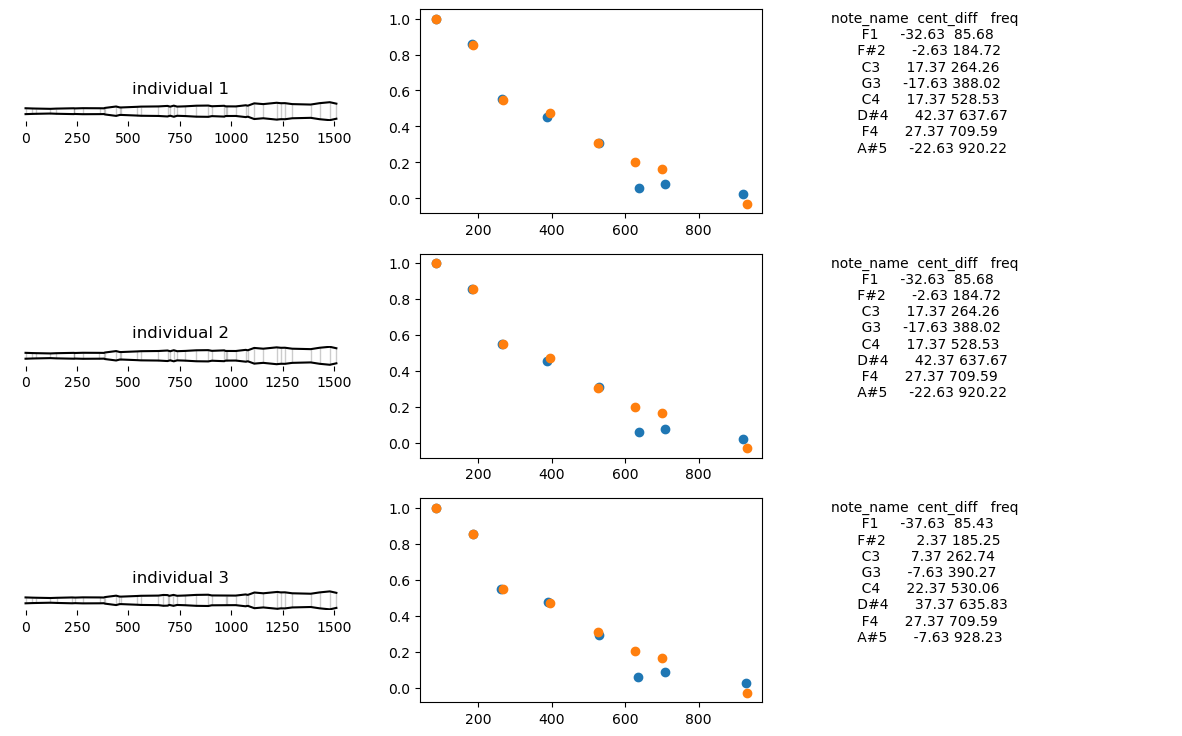

In [11]:
target_freqs, target_impedances, target_weights, geo = pickle.load(open("results/targets.bin", "rb"))
np.power(2, target_freqs)*1000

array([ 86.86988874, 185.41883588, 267.94336563, 396.85026299,
       526.68051798, 628.14375239, 701.00663283, 930.34217415])